In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
# Require cuda and cudnn
assert torch.cuda.is_available()
assert torch.backends.cudnn.enabled

In [7]:
%run ../../lib/download.py http://files.fast.ai/data/dogscats.zip data/lesson_1/

Directory data/lesson_1/ didn't exist, making


In [56]:
dogscats_dir = 'data/lesson_1/dogscats/'
train_data = path.join( dogscats_dir, 'train' )

PATH = dogscats_dir
sz = 224

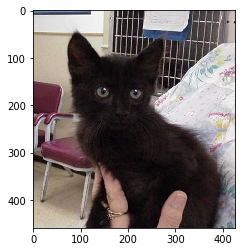

In [29]:
random_image_path = np.random.choice( os.listdir( path.join( train_data, 'cats' ) ) )
random_image = plt.imread( path.join( train_data, 'cats', random_image_path ) )
plt.imshow( random_image )

In [34]:
arch = resnet34
data = ImageClassifierData.from_paths( PATH, tfms=tfms_from_model( arch, sz ) )
learn = ConvLearner.pretrained( arch, data, precompute=True )
learn.fit( 0.1, 2 )

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/mike/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:35<00:00, 2471186.77it/s]


  0%|          | 0/360 [00:00<?, ?it/s]

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


100%|██████████| 32/32 [00:08<00:00,  3.96it/s]


  1%|▏         | 5/360 [00:00<00:20, 16.96it/s, loss=tensor(0.1704, device='cuda:0')]

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


 41%|████      | 147/360 [00:03<00:05, 39.15it/s, loss=tensor(1.00000e-02 *
 41%|████      | 147/360 [00:03<00:05, 39.11it/s, loss=tensor(1.00000e-02 *
 41%|████      | 147/360 [00:03<00:05, 38.99it/s, loss=tensor(1.00000e-02 *
 41%|████      | 147/360 [00:03<00:05, 38.95it/s, loss=tensor(1.00000e-02 *
 41%|████      | 147/360 [00:03<00:05, 38.91it/s, loss=tensor(1.00000e-02 *
 41%|████      | 147/360 [00:03<00:05, 38.83it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 173/360 [00:03<00:04, 45.69it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 173/360 [00:03<00:04, 45.55it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 173/360 [00:03<00:04, 45.50it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 173/360 [00:03<00:04, 45.46it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 173/360 [00:03<00:04, 45.41it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 173/360 [00:03<00:04, 45.37it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 173/360 [00:03<00:04, 45.32it/s, loss=tensor(1.00000e-02 *
 48%|████▊  

In [36]:
labels = data.val_y
labels

array([0, 0, 0, ..., 1, 1, 1])

In [51]:
data.classes
log_preds = learn.predict()
log_preds.shape
preds = np.argmax( log_preds, axis=1 )
probs = np.exp( log_preds )

In [54]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


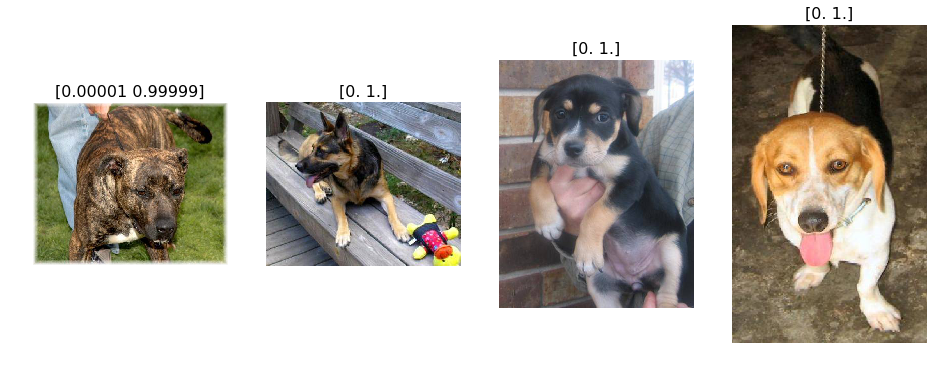

In [59]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


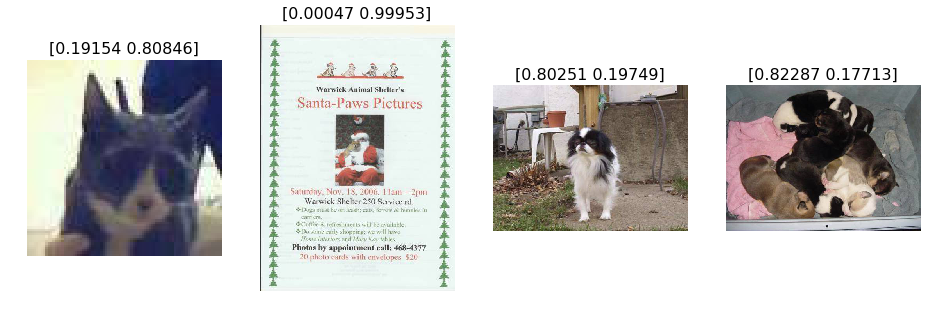

In [62]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

## Find Learning Rate Automatically

In [64]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [65]:
learning_rate = learn.lr_find()

  1%|▏         | 5/360 [00:00<00:19, 18.00it/s, loss=tensor(0.9261, device='cuda:0')]

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


 65%|██████▌   | 234/360 [00:04<00:02, 57.30it/s, loss=tensor(1.00000e-02 *
 65%|██████▌   | 234/360 [00:04<00:02, 57.24it/s, loss=tensor(1.00000e-02 *
 65%|██████▌   | 234/360 [00:04<00:02, 57.19it/s, loss=tensor(1.00000e-02 *
 65%|██████▌   | 234/360 [00:04<00:02, 57.13it/s, loss=tensor(1.00000e-02 *
 65%|██████▌   | 234/360 [00:04<00:02, 57.07it/s, loss=tensor(1.00000e-02 *
 65%|██████▌   | 234/360 [00:04<00:02, 57.02it/s, loss=tensor(1.00000e-02 *
 65%|██████▌   | 234/360 [00:04<00:02, 56.96it/s, loss=tensor(1.00000e-02 *
 65%|██████▌   | 234/360 [00:04<00:02, 56.90it/s, loss=tensor(1.00000e-02 *
 65%|██████▌   | 234/360 [00:04<00:02, 56.84it/s, loss=tensor(1.00000e-02 *
 65%|██████▌   | 234/360 [00:04<00:02, 56.79it/s, loss=tensor(1.00000e-02 *
 65%|██████▌   | 234/360 [00:04<00:02, 56.73it/s, loss=tensor(1.00000e-02 *
 86%|████████▌ | 308/360 [00:04<00:00, 70.72it/s, loss=tensor(0.4078, device='cuda:0')]


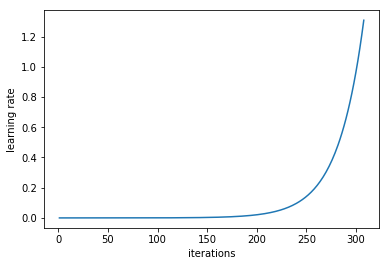

In [69]:
learn.sched.plot_lr()

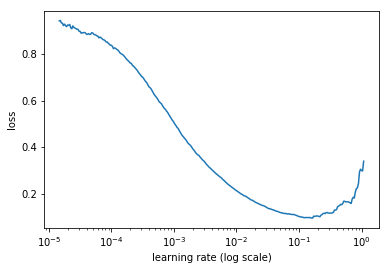

In [70]:
learn.sched.plot()